In [6]:
import time
import random
import numpy as np
from collections import defaultdict
import gymnasium as gym
import matplotlib.pyplot as plt

In [7]:
# ──────────────────────   Гиперпараметры   ──────────────────────
ENV_NAME    = "Taxi-v3"
EPISODES    = 500
ALPHA       = 0.3          # скорость обучения
GAMMA       = 0.99         # дисконт‑фактор
EPSILON     = 0.1          # ε‑жадность
SEED        = 42
# ────────────────────────────────────────────────────────────────

random.seed(SEED)
np.random.seed(SEED)

In [8]:
# ──────────────────────   функция тренировки  ──────────────────────
def train(env, seed:int):
    """Возвращает список episode_rewards"""
    Q      = defaultdict(lambda: np.zeros(env.action_space.n))
    rewards = []

    def choose_action(state):
        if random.random() < EPSILON:
            return env.action_space.sample()
        return int(np.argmax(Q[state]))

    for ep in range(EPISODES):
        state, _ = env.reset()
        total_r  = 0
        done     = False

        while not done:
            # 1.шаг
            action        = choose_action(state)
            next_state, r, done, truncated, _ = env.step(action)
            total_r      += r

            # 2. Q‑learning обновление
            max_next_Q    = np.max(Q[next_state])
            target        = r + GAMMA * max_next_Q * (1 - done)
            Q[state][action] = ALPHA*Q[state][action] + (1-ALPHA)*target

            state = next_state

        rewards.append(total_r)
    return rewards, Q



Обучение заняло 0.2 с


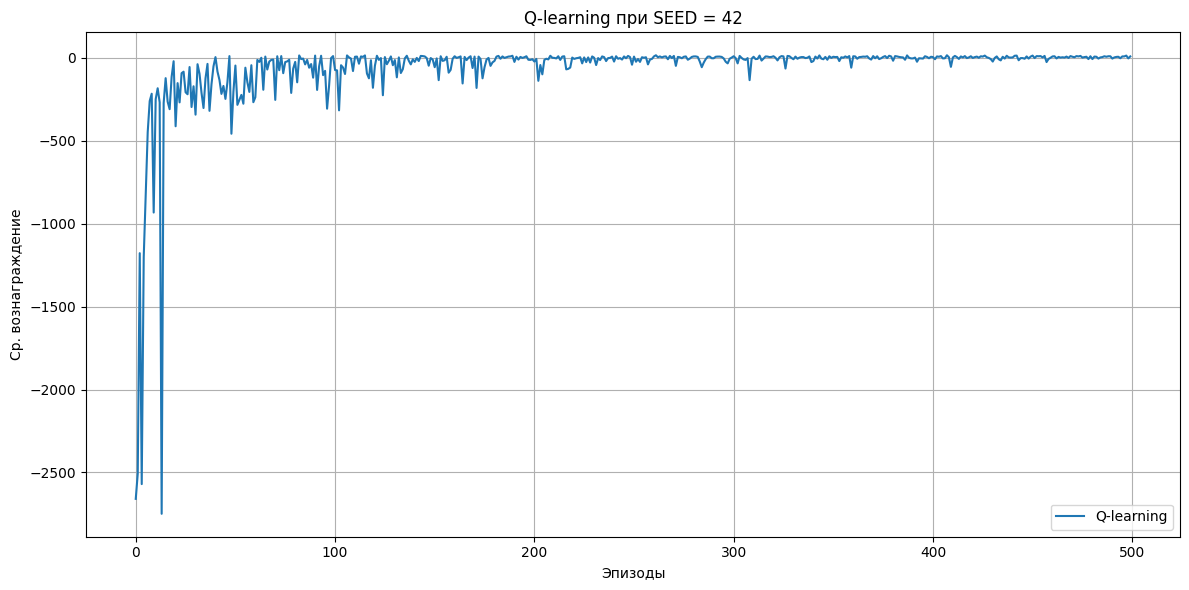

In [9]:
SEED        = 42
random.seed(SEED)
np.random.seed(SEED)
# ──────────────────────   Обучение   ──────────────────────
env = gym.make(ENV_NAME)
start = time.time()
rewards_qlearn,Q = train(env, SEED)          
print(f"Обучение заняло {time.time()-start:.1f} с")



# ──────────────────────   Визуализация обучения  ──────────────────────
plt.figure(figsize=(12,6))
plt.plot(rewards_qlearn, label="Q‑learning")
plt.xlabel("Эпизоды"); plt.ylabel(f"Ср. вознаграждение")
plt.title(f"Q‑learning при SEED = {SEED}")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

Обучение заняло 0.2 с


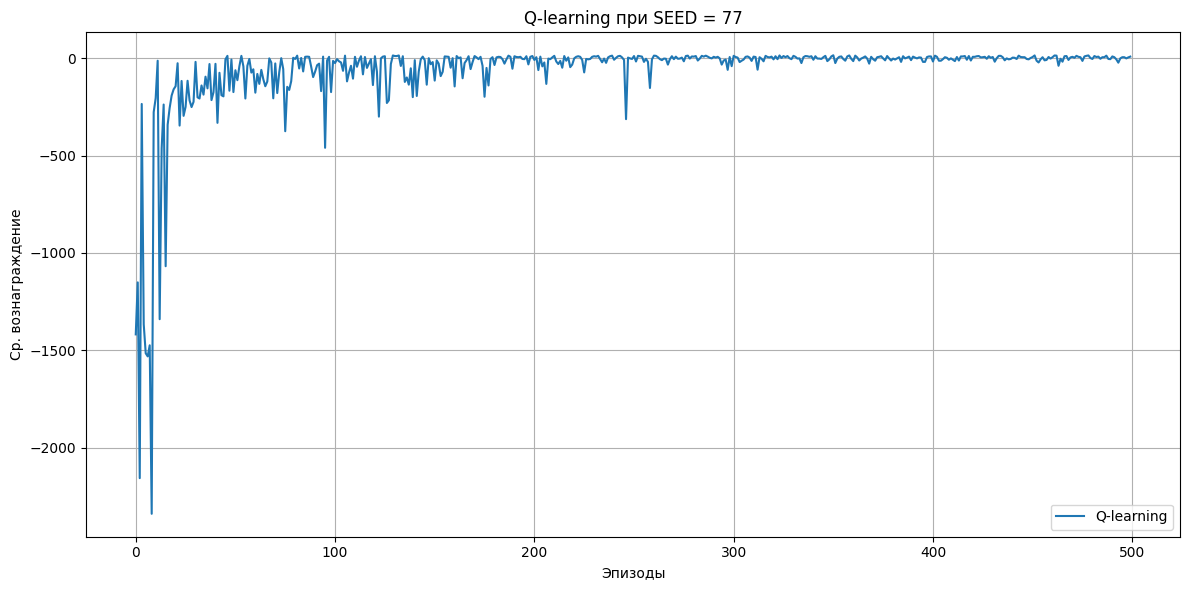

In [10]:
SEED        = 77
random.seed(SEED)
np.random.seed(SEED)
# ──────────────────────   Обучение   ──────────────────────
env = gym.make(ENV_NAME)
start = time.time()
rewards_qlearn,Q = train(env, SEED)          
print(f"Обучение заняло {time.time()-start:.1f} с")



# ──────────────────────   Визуализация обучения  ──────────────────────
plt.figure(figsize=(12,6))
plt.plot(rewards_qlearn, label="Q‑learning")
plt.xlabel("Эпизоды"); plt.ylabel(f"Ср. вознаграждение")
plt.title(f"Q‑learning при SEED = {SEED}")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

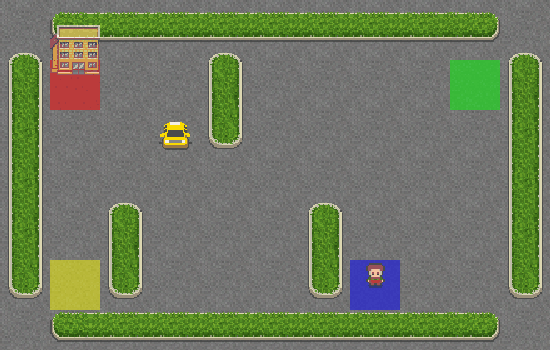

In [12]:
# ──────────────────────   Визуализация результата  ──────────────────────
import imageio.v2 as imageio
from IPython.display import Image, display


duration = 100 #длительнотсь эпизода
# создадим новую среду
env = gym.make(ENV_NAME, render_mode="rgb_array")

# Записываем видео 
frames = []
state, _ = env.reset()
for _ in range(duration):

    action = np.argmax(Q[state])
    frame = env.render()
    frames.append(frame)
    state, _, terminated, truncated, _ = env.step(action)
    if terminated or truncated:
        break
env.close()

# === Сохраняем GIF ===
gif_path = "episode.gif"
# fps – скорость анимации (кадров в секунду)
imageio.mimsave(gif_path, frames, fps=10)

# === Показываем GIF в ноутбуке ===
display(Image(filename=gif_path))